# Import libararies

In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import mannwhitneyu

In [2]:
# This is to clear the warnings from the notebook, usually we should leave this on
import warnings
warnings.filterwarnings('ignore') 

# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

# Data Preprocessing

In [3]:
data = pd.read_csv('airbnb_clean.csv')
data.head()

,id,name,description,neighbourhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_communication,review_location,review_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156,"['oasis', 'city']","['central', 'city', 'reached', 'easy', 'walk',...","['close', 'everything', 'everywhere', 'many', ...",40855,Colleen,2009-09-23,"Potts Point, New South Wales, Australia","['recently', 'retired', 'lived', 'worked', 'co...",missing,...,4.77,4.82,4.71,False,False,1,0,1,0,1.34
1,14250,"['manly', 'harbour', 'house']","['beautifully', 'renovated', 'spacious', 'quie...","['balgowlah', 'heights', 'one', 'prestigious',...",55948,Heidi,2009-11-20,"Sydney, New South Wales, Australia","['canadian', 'made', 'australia', 'home', 'ten...",within a few hours,...,4.33,4.67,4.33,True,False,2,2,0,0,0.04
2,15253,"['unique', 'designer', 'rooftop', 'apartment',...","['penthouse', 'living', 'best', 'staying', 'un...","['location', 'really', 'central', 'number', 't...",59850,Morag,2009-12-03,"Sydney, New South Wales, Australia","['originally', 'scottish', 'made', 'sydney', '...",within an hour,...,4.67,4.7,4.47,True,True,1,0,1,0,3.21
3,44545,"['sunny', 'darlinghurst', 'warehouse', 'apartm...","['sunny', 'warehouseloft', 'apartment', 'heart...","['darlinghurst', 'home', 'sydney', 'best', 're...",112237,Atari,2010-04-22,"Sydney, New South Wales, Australia","['curious', 'world', 'full', 'wanderlust', 'ai...",missing,...,4.96,4.93,4.77,False,False,1,1,0,0,0.56
4,58506,"['studio', 'yindi', 'mosman', 'sydney']","['open', 'plan', 'apartment', 'opens', 'onto',...","['mosman', 'smart', 'middle', 'upper', 'class'...",279955,John,2010-11-06,"Sydney, New South Wales, Australia","['faber', 'est', 'suae', 'quisquae', 'fortunae...",within a few hours,...,4.9,4.73,4.68,True,False,1,1,0,0,2.23


In [4]:
data = data.drop(['id', 'host_id'], axis = 1)

In [5]:
# transform host_since from object to datetime
data['host_since'] = pd.to_datetime(data['host_since'], dayfirst = True, format = '%Y/%m/%d', errors = 'coerce')

In [6]:
# finding mean of response percent
total_response_percent = 0
count_response_percent = 0
for x in data['response_percent']:
    if x != 'missing':
        total_response_percent += pd.to_numeric(x, downcast = 'float')
        count_response_percent += 1

avg_response_percent = total_response_percent / count_response_percent
# avg_response_percent

In [7]:
# transform response_percent from object to float
# convert missing values to 50

data_response_percent = []

for x in data['response_percent']:
    if x == 'missing':
        value = avg_response_percent
    else:
        value = x
    data_response_percent.append(pd.to_numeric(value, downcast = 'float'))
data['response_percent'] = data_response_percent

In [8]:
# finding mean of acceptance percent
total_acceptance_percent = 0
count_acceptance_percent = 0
for x in data['acceptance_percent']:
    if x != 'missing':
        total_acceptance_percent += pd.to_numeric(x, downcast = 'float')
        count_acceptance_percent += 1

avg_acceptance_percent = total_acceptance_percent / count_acceptance_percent
# avg_acceptance_percent

In [9]:
# transform acceptance_percent from object to float
# convert missing values to 50

data_acceptance_percent = []

for x in data['acceptance_percent']:
    if x == 'missing':
        value = avg_acceptance_percent
    else:
        value = x
    data_acceptance_percent.append(pd.to_numeric(value, downcast = 'float'))
data['acceptance_percent'] = data_acceptance_percent

In [10]:
# finding mean of reviews per month
total_reviews_per_month = 0
count_reviews_per_month = 0
for x in data['reviews_per_month']:
    if x != 'missing':
        total_reviews_per_month += pd.to_numeric(x, downcast = 'float')
        count_reviews_per_month += 1

avg_reviews_per_month = total_reviews_per_month / count_reviews_per_month
avg_reviews_per_month

0.6415008955105727

In [11]:
# transform reviews_per_month from object to float

data_reviews_per_month = []

for x in data['reviews_per_month']:
    if x == 'missing':
        value = avg_reviews_per_month
    else:
        value = x
    data_reviews_per_month.append(pd.to_numeric(value, downcast = 'float'))
data['reviews_per_month'] = data_reviews_per_month

In [12]:
# mean function
def find_mean(variable):
    total = 0
    count = 0
    for x in data[variable]:
        if x != 'missing':
            total += pd.to_numeric(x, downcast = 'float')
            count += 1

    avg = total / count
    return avg

In [13]:
# transform reviews from object to float
review_scores_all = ['review_rating', 'review_accuracy', 'review_cleanliness', 'review_checkin', 
                     'review_communication', 'review_location' , 'review_value']

for review in review_scores_all:
    avg = find_mean(review)
    data_reviews = []
    for x in data[review]:
        if x == 'missing':
            value = avg
        else:
            value = x
        data_reviews.append(pd.to_numeric(value, downcast = 'float'))
    data[review] = data_reviews

In [14]:
y = data['price']

X = data[['bedrooms', 'accommodates', 'beds', 'latitude', 'longitude', 'acceptance_percent', 'review_rating', 
          'host_has_profile_pic', 'host_is_verified', 'room_type', 'has_availability', 'instant_bookable']]

X_dummy = pd.get_dummies(X, drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=1)

# Models

tb1: Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [17]:
# hyper parameters
depth = 4 #insert depth

# model
decision_tree_reg = DecisionTreeRegressor(max_depth = depth, random_state=1)
# decision_tree_reg.fit(X_train, y_train)
# y_pred = decision_tree_reg.predict(X_test)

#     print('Decision Tree at depth {}'.format(depth))
#     print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
#     print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
#     print('MAE: {}'.format(np.mean(np.abs(y_test - y_pred))))
#     Adj_R2_p1 = (1- metrics.r2_score(y_test, y_pred))
#     Adj_R2_p2 = (len(X_test) - 1) - (len(X_test) - len(X_test.iloc[0]) - 1)
#     print('Adj R2: {}'.format((1 - (Adj_R2_p1*Adj_R2_p2))))
#     print('')
#     print('-----------------------------------------')
#     print('')

In [18]:
# variables
tb1 = decision_tree_reg
# tb1_yhat = y_pred

tb2: Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
random_forest_reg = RandomForestRegressor(max_depth = 10, random_state=1)
random_forest_reg.fit(X_train, y_train)
y_pred = random_forest_reg.predict(X_test)

# print('Random Forest at depth {}'.format(10))
# print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
# print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
# print('MAE: {}'.format(np.mean(np.abs(y_test - y_pred))))
# Adj_R2_p1 = (1- metrics.r2_score(y_test, y_pred))
# Adj_R2_p2 = (len(X_test) - 1) - (len(X_test) - len(X_test.iloc[0]) - 1)
# print('Adj R2: {}'.format((1 - (Adj_R2_p1*Adj_R2_p2))))

In [21]:
# variables
tb2 = random_forest_reg
# tb2_yhat = y_pred

tb3: Optimized Forest

In [22]:
from sklearn.model_selection import GridSearchCV
import time

In [23]:
#hyperparameter
n = 91
max_k = 'sqrt'
depth = 8

#model
optimised_forest_reg = RandomForestRegressor(max_depth = depth, max_features = max_k, n_estimators = n, random_state=1)
optimised_forest_reg.fit(X_train, y_train)
# y_pred = optimised_forest_reg.predict(X_test)

# print('Optimised forest:')
# print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
# print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
# print('MAE: {}'.format(np.mean(np.abs(y_test - y_pred))))
# Adj_R2_p1 = (1- metrics.r2_score(y_test, y_pred))
# Adj_R2_p2 = (len(X_test) - 1) - (len(X_test) - len(X_test.iloc[0]) - 1)
# print('Adj R2: {}'.format((1 - (Adj_R2_p1*Adj_R2_p2))))

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=91,
                      random_state=1)

In [24]:
tb3 = optimised_forest_reg
# tb3_yhat = y_pred

ln1: Multiple Linear Regression

In [25]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)

LinearRegression()

In [26]:
# print('Linear Regression:')
# print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
# print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
# print('MAE: {}'.format(np.mean(np.abs(y_test - y_pred))))
# Adj_R2_p1 = (1- metrics.r2_score(y_test, y_pred))
# Adj_R2_p2 = (len(X_test) - 1) - (len(X_test) - len(X_test.iloc[0]) - 1)
# print('Adj R2: {}'.format((1 - (Adj_R2_p1*Adj_R2_p2))))

In [27]:
ln1 = regr
# ln1_yhat = y_pred

ln2:  Ridge Regression

In [28]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

#hyperparameter
a = 0.99 #insert alpha

#modeling
clf = Ridge(alpha=a)
clf.fit(X_train, y_train)
# Ridge()

Ridge(alpha=0.99)

In [29]:
ln2 = clf
# ln2_yhat = scores

All together

In [30]:
#tb1: Decision Tree
from sklearn.tree import DecisionTreeRegressor

depth = 4 

decision_tree_reg = DecisionTreeRegressor(max_depth = depth, random_state=1)
decision_tree_reg.fit(X_train, y_train)

tb1 = decision_tree_reg

#tb2: Random Forest
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(max_depth = 10, random_state=1)
random_forest_reg.fit(X_train, y_train)

tb2 = random_forest_reg

#tb3: Optimized Forest
n = 91
max_k = 'sqrt'
depth = 8

optimised_forest_reg = RandomForestRegressor(max_depth = depth, max_features = max_k, n_estimators = n, random_state=1)
optimised_forest_reg.fit(X_train, y_train)

tb3 = optimised_forest_reg

#ln1: Multiple Linear Regression
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

ln1 = regr

#ln2: Ridge Regression
from sklearn.linear_model import Ridge

a = 0.99 #insert alpha

clf = Ridge(alpha=a)
clf.fit(X_train, y_train)

ln2 = clf

In [31]:
def get_models():
    models = dict()
    models['Decision Tree'] = tb1
    models['Random Forest'] = tb2
    models['Optimized RT'] = tb3
    models['MLR'] = ln1
    models['Ridge'] = ln2
    return models

In [32]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    rmse_scores = np.sqrt(abs(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')))
    mae_scores = abs(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise'))
    
    r2_scores = abs(cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise'))
    adj_r2_p1 = (1-r2_scores)
    adj_r2_p2 = (len(X) - 1) - (len(X) - len(X.iloc[0]) - 1)
    adj_r2_scores = (1 - (adj_r2_p1*adj_r2_p2))
     
    return rmse_scores, mae_scores, adj_r2_scores

In [33]:
%%time 

from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt

# define dataset
X, y = X_train, y_train

# get the models to evaluate
models = get_models()

# evaluate the models and store results
def eval_model(X, y, models):
    rmse_results, mae_results, adj_r2_results, names = list(), list(), list(), list()
    for name, model in models.items():
        rmse_scores, mae_scores, adj_r2_scores = evaluate_model(model, X, y)
        rmse_results.append(rmse_scores)
        mae_results.append(mae_scores)
        adj_r2_results.append(adj_r2_scores)
        names.append(name)
        print('>%s %.3f RMSE (%.3f)' % (name, mean(rmse_scores), std(rmse_scores)))
        print('>%s %.3f MAE (%.3f)' % (name, mean(mae_scores), std(mae_scores)))
        print('>%s %.3f Adj. R2 (%.3f)' % (name, mean(adj_r2_scores), std(adj_r2_scores)))

    # plot model performance for comparison
    plt.figure()
    plt.boxplot(rmse_results, labels=names, showmeans=True)
    plt.title('RMSE Boxplot of the Models')
    plt.show()

    plt.figure()
    plt.boxplot(mae_results, labels=names, showmeans=True)
    plt.title('MAE Boxplot of the Models')
    plt.show()

    plt.figure()
    plt.boxplot(adj_r2_results, labels=names, showmeans=True)
    plt.title('Adj. R2 Boxplot of the Models')
    plt.show()

Wall time: 0 ns


>Decision Tree 427.403 RMSE (145.824)
>Decision Tree 131.168 MAE (7.219)
>Decision Tree -8.984 Adj. R2 (1.650)
>Random Forest 417.232 RMSE (148.345)
>Random Forest 119.509 MAE (7.732)
>Random Forest -8.517 Adj. R2 (1.977)
>Optimized RT 405.001 RMSE (151.941)
>Optimized RT 119.592 MAE (7.162)
>Optimized RT -7.910 Adj. R2 (2.070)
>MLR 432.443 RMSE (144.978)
>MLR 151.296 MAE (7.053)
>MLR -9.223 Adj. R2 (1.494)
>Ridge 432.442 RMSE (144.979)
>Ridge 151.188 MAE (7.049)
>Ridge -9.223 Adj. R2 (1.494)


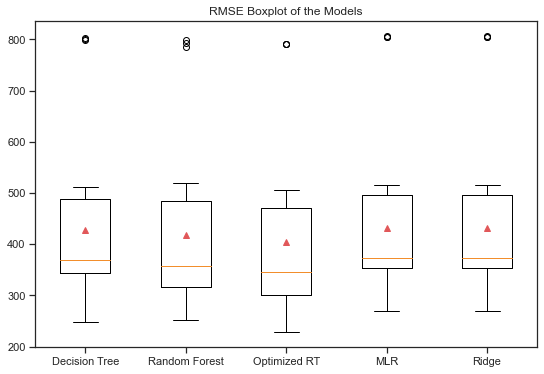

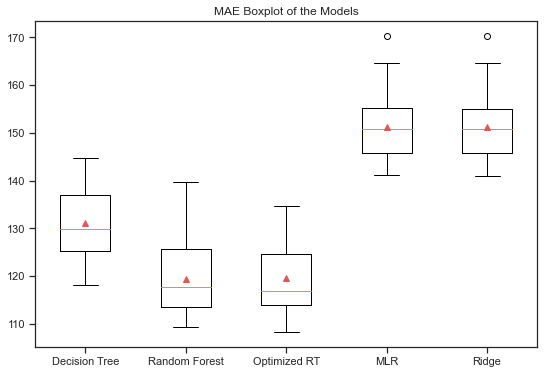

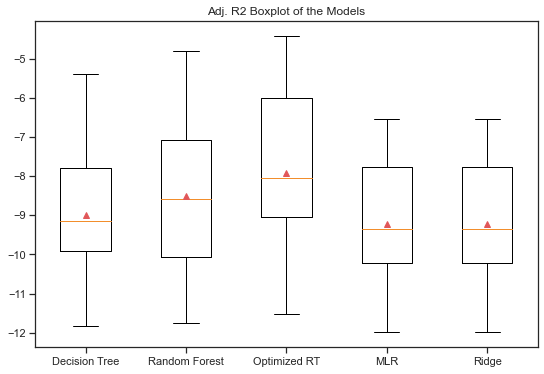

In [34]:
eval_model(X_train, y_train, models)

Analysis:
- Optimized RT performs the best overall with a MSE of..., MAE of..., and Adj R2 of ....
- The tree-based models i did better than the regression models
- The two regression models returns the similar results, with ridge slightly better

Stacking Regressor Model:
* Linear Regression Meta Model
* Combined by 5-Fold Cross Validation
* Chosen models: Optimized RT and Ridge Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('Optimized RT', tb3))
    level0.append(('Ridge', ln2))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [36]:
# get a list of models to evaluate 2.0 - adding stacking, removing others
def get_models():
    models = dict()
    models['Decision Tree'] = tb1
    models['Random Forest'] = tb2
    models['Optimized RT'] = tb3
    models['MLR'] = ln1
    models['Ridge'] = ln2
    models['Stacking'] = get_stacking()
    return models

>Decision Tree 427.403 RMSE (145.824)
>Decision Tree 131.168 MAE (7.219)
>Decision Tree -8.984 Adj. R2 (1.650)
>Random Forest 417.232 RMSE (148.345)
>Random Forest 119.509 MAE (7.732)
>Random Forest -8.517 Adj. R2 (1.977)
>Optimized RT 405.001 RMSE (151.941)
>Optimized RT 119.592 MAE (7.162)
>Optimized RT -7.910 Adj. R2 (2.070)
>MLR 432.443 RMSE (144.978)
>MLR 151.296 MAE (7.053)
>MLR -9.223 Adj. R2 (1.494)
>Ridge 432.442 RMSE (144.979)
>Ridge 151.188 MAE (7.049)
>Ridge -9.223 Adj. R2 (1.494)
>Stacking 404.262 RMSE (152.177)
>Stacking 118.272 MAE (7.169)
>Stacking -7.886 Adj. R2 (2.119)


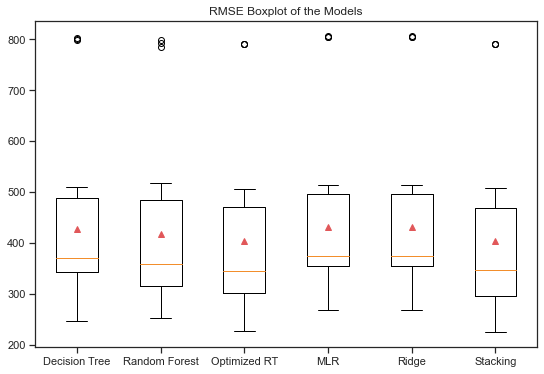

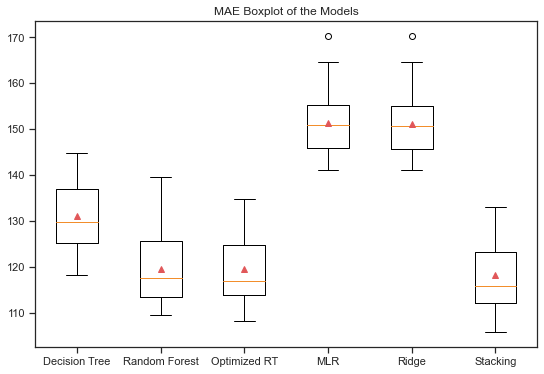

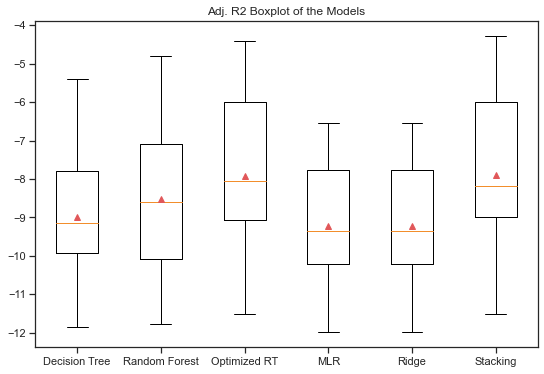

Wall time: 6min 54s


In [37]:
%%time

# define dataset
X, y = X_train, y_train

# get the models to evaluate
models = get_models()

# evaluate the models
eval_model(X_train, y_train, models)

# Test Set

In [38]:
def evaluate_model_2(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f'{name}')
#         print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
        print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
        print('MAE: {}'.format(np.mean(np.abs(y_test - y_pred))))
        Adj_R2_p1 = (1- metrics.r2_score(y_test, y_pred))
        Adj_R2_p2 = (len(X_test) - 1) - (len(X_test) - len(X_test.iloc[0]) - 1)
        print('Adj R2: {}'.format((1 - (Adj_R2_p1*Adj_R2_p2))))
        print()

In [39]:
%%time 

# get the models to evaluate
models = get_models()

evaluate_model_2(models, X_train, y_train, X_test, y_test)

Decision Tree
RMSE: 322.65766452835237
MAE: 122.5664588469157
Adj R2: -7.270915608801348

Random Forest
RMSE: 305.72988498219775
MAE: 110.84630979354417
Adj R2: -6.425836853916586

Optimized RT
RMSE: 297.50108479044366
MAE: 111.40538823497374
Adj R2: -6.031479662622681

MLR
RMSE: 343.8997152702982
MAE: 143.94133934676884
Adj R2: -8.395788888584065

Ridge
RMSE: 343.8843591524119
MAE: 143.84406097581999
Adj R2: -8.394949808968244

Stacking
RMSE: 293.7663037961702
MAE: 110.16343531177763
Adj R2: -5.8560436758992385

Wall time: 17.9 s


In [40]:
import winsound
winsound.MessageBeep()

In [41]:
clf = get_stacking()

In [42]:
clf.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('Optimized RT',
                               RandomForestRegressor(max_depth=8,
                                                     max_features='sqrt',
                                                     n_estimators=91,
                                                     random_state=1)),
                              ('Ridge', Ridge(alpha=0.99))],
                  final_estimator=LinearRegression())

In [43]:
print(clf.final_estimator_.coef_)  # Regression Coefficients - Meta Model
print()
# Optimixed RT .. you can access its attributes by .name_of_attribute
print(clf.named_estimators_['Optimized RT'])
print()
# Ridge .. you can access its attributes by .name_of_attribute
print(clf.named_estimators_['Ridge'])
print()
print(clf.estimators_)  # All estimators in a list
print()

[ 1.19114731 -0.10233124]

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=91,
                      random_state=1)

Ridge(alpha=0.99)

[RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=91,
                      random_state=1), Ridge(alpha=0.99)]

